In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from collections import Counter
%matplotlib inline

train_path = '../train/train.csv'
test_path = '../test/test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7


In [2]:
word_to_num = {'white' : 0, 'red' : 1}
train_df['type'] = train_df['type'].replace(word_to_num)
train_df

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,0,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,0,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,0,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,0,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,0,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,0,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,0,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,0,6


In [119]:
train_df

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,0,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,0,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,0,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,0,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,0,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,0,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,0,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,0,6


In [70]:
from scipy import stats
zscore_df = train_df.iloc[:,1:-2].apply(stats.zscore)
zscore_df['quality'] = train_df['quality']
zscore_df['id'] = train_df['id']
zscore_df['type'] = train_df['type']

In [71]:
X = zscore_df.drop(['id', 'quality'], axis=1)
y = zscore_df['quality']

In [73]:
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [72]:

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X, y)

prediction = model.predict(X)

score = ACCURACY(y, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

LogisticRegression(solver='liblinear')

모델의 정확도는 55.09% 입니다


normal : 54.22  
zscore_nomarlization : 55.15%  
min_max nomarlization : 43.92 %  
z_norm + outlier drop : 55.07 %  
z_norm + outlier drop + SMOTE : 46.67 %  
z_norm + outlier drop + ADASYN : 46.91 %  
z_norm +  SMOTE : 45.28 %    
z_norm +  ADASYN : 45.58 %

In [75]:
zscore_drop_df = zscore_df
for i in zscore_drop_df.iloc[:,:-3].columns:
    zscore_drop_df = zscore_drop_df[(zscore_drop_df[i] > -2) & (zscore_drop_df[i] < 2)]
zscore_drop_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,id,type
0,0.613164,-0.973871,0.346320,-0.862826,-0.444893,-0.896417,-0.363344,-1.135570,-0.952533,0.524814,1.342873,6,1,0
2,-0.853685,-0.412283,0.072032,-0.675924,-0.976867,-0.263668,0.013335,-1.987120,-0.581815,-1.546504,1.677986,6,3,0
3,-0.622077,-0.100290,1.237759,1.089263,-0.248903,1.519535,1.609735,0.698538,-0.828960,0.457997,-0.919137,5,4,0
4,0.921975,0.211703,0.757754,-0.655157,0.199075,-1.068985,-1.744499,0.272763,-0.272884,1.861148,0.588870,7,5,1
5,-0.930887,-0.037891,0.414893,0.881594,-0.444893,-0.091100,0.138894,0.240011,1.580702,-0.343803,0.421313,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.690367,-0.849074,1.169187,1.317699,-0.220904,0.886786,1.717357,0.698538,-0.767174,-0.477437,-0.416468,7,3225,0
3226,-0.622077,-1.098668,-0.065113,-0.032150,-0.360897,0.656695,0.730818,-0.038380,0.839268,-0.410620,0.002423,5,3227,0
3228,-0.930887,-0.349884,-0.476546,-0.758992,-0.388896,-1.299076,-0.148099,-0.578787,-0.828960,0.123914,-1.254250,5,3229,0
3229,0.381557,-0.349884,-0.202257,0.300121,-0.416894,-0.091100,0.838440,0.174507,1.395344,0.457997,0.002423,6,3230,0


In [93]:
zscore_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,id,type
0,0.613164,-0.973871,0.346320,-0.862826,-0.444893,-0.896417,-0.363344,-1.135570,-0.952533,0.524814,1.342873,6,1,0
1,0.227151,0.274102,-0.202257,-0.115217,-0.976867,0.426604,-0.058413,-1.443438,-0.828960,-0.343803,2.096877,7,2,0
2,-0.853685,-0.412283,0.072032,-0.675924,-0.976867,-0.263668,0.013335,-1.987120,-0.581815,-1.546504,1.677986,6,3,0
3,-0.622077,-0.100290,1.237759,1.089263,-0.248903,1.519535,1.609735,0.698538,-0.828960,0.457997,-0.919137,5,4,0
4,0.921975,0.211703,0.757754,-0.655157,0.199075,-1.068985,-1.744499,0.272763,-0.272884,1.861148,0.588870,7,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,-0.622077,-1.098668,-0.065113,-0.032150,-0.360897,0.656695,0.730818,-0.038380,0.839268,-0.410620,0.002423,5,3227,0
3227,-0.622077,-0.973871,-0.270829,2.407962,-0.248903,1.289444,0.407951,0.842646,0.221405,-1.212420,0.002423,6,3228,0
3228,-0.930887,-0.349884,-0.476546,-0.758992,-0.388896,-1.299076,-0.148099,-0.578787,-0.828960,0.123914,-1.254250,5,3229,0
3229,0.381557,-0.349884,-0.202257,0.300121,-0.416894,-0.091100,0.838440,0.174507,1.395344,0.457997,0.002423,6,3230,0


In [110]:
from matplotlib import pyplot
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

In [125]:
# X = zscore_drop_df.drop(['id', 'quality'], axis=1)
# y = zscore_drop_df['quality']
X = zscore_df.drop(['id', 'quality'], axis=1)
y = zscore_df['quality']

모델의 정확도는 55.09% 입니다
Class=6, n=1418 (43.887%)
Class=7, n=539 (16.682%)
Class=5, n=1069 (33.086%)
Class=8, n=97 (3.002%)
Class=4, n=108 (3.343%)


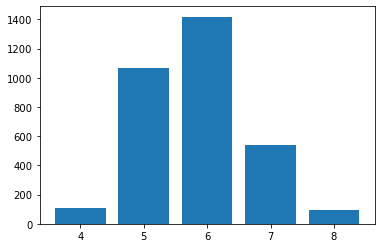

In [126]:


# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X, y)

prediction = model.predict(X)

score = ACCURACY(y, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")
count_and_plot(y)

In [109]:
accurate = y[y==prediction]
print("정답을 맞춘 개수 : ", len(accurate))

accu_cnt = Counter(accurate)
true_cnt = Counter(y)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {accu_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개, 정답률: {accu_cnt[key]/true_cnt[key]*100:.2f}%")

정답을 맞춘 개수 :  1780
4 값 예측 개수: 1개, 실제 값 개수: 108개, 정답률: 0.93%
5 값 예측 개수: 644개, 실제 값 개수: 1069개, 정답률: 60.24%
6 값 예측 개수: 1050개, 실제 값 개수: 1418개, 정답률: 74.05%
7 값 예측 개수: 85개, 실제 값 개수: 539개, 정답률: 15.77%
8 값 예측 개수: 0개, 실제 값 개수: 97개, 정답률: 0.00%


Class=6, n=1418 (20.000%)
Class=7, n=1418 (20.000%)
Class=5, n=1418 (20.000%)
Class=8, n=1418 (20.000%)
Class=4, n=1418 (20.000%)


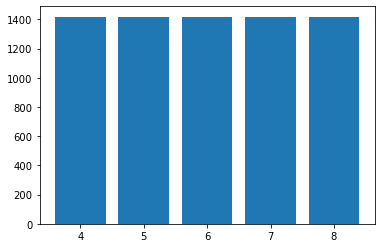

In [111]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

In [112]:

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X_resampled, y_resampled)

prediction = model.predict(X_resampled)

score = ACCURACY(y_resampled, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 45.28% 입니다


In [115]:
accurate = y_resampled[y_resampled==prediction]
print("정답을 맞춘 개수 : ", len(accurate))

accu_cnt = Counter(accurate)
true_cnt = Counter(y_resampled)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {accu_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개, 정답률: {accu_cnt[key]/true_cnt[key]*100:.2f}%")

정답을 맞춘 개수 :  3210
4 값 예측 개수: 991개, 실제 값 개수: 1418개, 정답률: 69.89%
5 값 예측 개수: 688개, 실제 값 개수: 1418개, 정답률: 48.52%
6 값 예측 개수: 249개, 실제 값 개수: 1418개, 정답률: 17.56%
7 값 예측 개수: 340개, 실제 값 개수: 1418개, 정답률: 23.98%
8 값 예측 개수: 942개, 실제 값 개수: 1418개, 정답률: 66.43%


Class=6, n=1418 (20.260%)
Class=7, n=1463 (20.903%)
Class=5, n=1307 (18.674%)
Class=8, n=1417 (20.246%)
Class=4, n=1394 (19.917%)


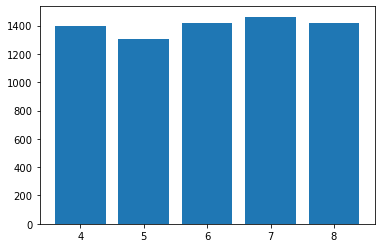

In [116]:

#strategy = {4:993, 5:993, 6:993, 7:993, 8:993}
strategy = {4:1418 , 5:1418 , 6:1418 , 7:1418 , 8:1418 }
X_resampled, y_resampled = ADASYN(sampling_strategy=strategy).fit_resample(X, y)
count_and_plot(y_resampled)

In [117]:

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X_resampled, y_resampled)

prediction = model.predict(X_resampled)

score = ACCURACY(y_resampled, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 45.79% 입니다


In [118]:
accurate = y_resampled[y_resampled==prediction]
print("정답을 맞춘 개수 : ", len(accurate))

accu_cnt = Counter(accurate)
true_cnt = Counter(y_resampled)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {accu_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개, 정답률: {accu_cnt[key]/true_cnt[key]*100:.2f}%")

정답을 맞춘 개수 :  3205
4 값 예측 개수: 942개, 실제 값 개수: 1394개, 정답률: 67.58%
5 값 예측 개수: 550개, 실제 값 개수: 1307개, 정답률: 42.08%
6 값 예측 개수: 302개, 실제 값 개수: 1418개, 정답률: 21.30%
7 값 예측 개수: 450개, 실제 값 개수: 1463개, 정답률: 30.76%
8 값 예측 개수: 961개, 실제 값 개수: 1417개, 정답률: 67.82%


In [120]:
X = train_df.drop(['id', 'quality'], axis=1)
y = train_df['quality']

Class=6, n=1418 (20.000%)
Class=7, n=1418 (20.000%)
Class=5, n=1418 (20.000%)
Class=8, n=1418 (20.000%)
Class=4, n=1418 (20.000%)


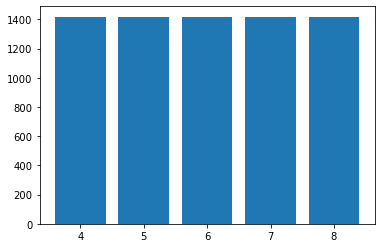

In [121]:
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

In [122]:

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X_resampled, y_resampled)

prediction = model.predict(X_resampled)

score = ACCURACY(y_resampled, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 45.77% 입니다


Class=6, n=1418 (21.098%)
Class=7, n=1319 (19.625%)
Class=5, n=1178 (17.527%)
Class=8, n=1404 (20.890%)
Class=4, n=1402 (20.860%)


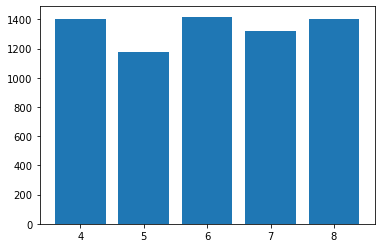

In [123]:

#strategy = {4:993, 5:993, 6:993, 7:993, 8:993}
strategy = {4:1418 , 5:1418 , 6:1418 , 7:1418 , 8:1418 }
X_resampled, y_resampled = ADASYN(sampling_strategy=strategy).fit_resample(X, y)
count_and_plot(y_resampled)

In [124]:

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X_resampled, y_resampled)

prediction = model.predict(X_resampled)

score = ACCURACY(y_resampled, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 48.01% 입니다
